<a href="https://colab.research.google.com/github/hyunus/SYDE-522/blob/master/Copy_of_Assignment_1_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: PCA

This assignment will be marked out of 100. The total weight towards the course is 6%.

## What you will learn

* Working with images using scikit-image
* PCA using scikit-learn
* Practical applications of PCA

## Note
* Use Google Colab to do this assignment.
* Don't change existing code or text.
* Add code and write text as instructed.

## Submission
* File > Download .ipynb
* Submit .ipynb file on the Learn.  

## Submission Notes
For task 4, I didn't use the `Patchify` method because I'm pretty sure the image is already organized into patches. The images are also really small -- only 28x28 pixels each so they display really blurry. 

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [0]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [3]:
# n_components=2 because I want to convert 5d data to 2d (dimensionality reduction)
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [4]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.52753284, 0.50292802, 0.50043414, 0.52139678, 0.54601097])

In [5]:
# basis vectors
pca.components_

array([[-0.47479879,  0.2946198 ,  0.48163137,  0.66447034, -0.11948081],
       [-0.37962454,  0.46746029, -0.17671396, -0.21593943,  0.74800296]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [6]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [7]:
pca.transform(data_to_reduce)

array([[ 0.07790456, -0.02517924],
       [ 0.04229223, -0.17575231],
       [-0.08155451, -0.07416063],
       [-0.4363177 ,  0.07177784],
       [ 0.46387376,  0.36095443],
       [-0.02419401, -0.54753569],
       [-0.00344845,  0.32884385],
       [ 0.49420838,  0.33418415],
       [-0.0372899 ,  0.23209598],
       [-0.0124172 , -0.20164295]])

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [8]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.50010251, 0.51410995, 0.54240494, 0.57859924, 0.51786873],
       [0.57417243, 0.43323092, 0.55186129, 0.58745056, 0.40949461],
       [0.59440802, 0.4442333 , 0.47426015, 0.48322043, 0.5002828 ],
       [0.70744733, 0.40793348, 0.2776057 , 0.21597694, 0.6518326 ],
       [0.17025898, 0.80832628, 0.66006461, 0.75168284, 0.76058194],
       [0.74687811, 0.23984879, 0.58553874, 0.62355512, 0.13934338],
       [0.40433297, 0.65563348, 0.44066196, 0.44809503, 0.79239917],
       [0.16601879, 0.80474942, 0.6794054 , 0.77762006, 0.73693329],
       [0.45712871, 0.60043733, 0.44145955, 0.44650007, 0.72407488],
       [0.60997712, 0.4050096 , 0.53008675, 0.55668858, 0.39666506]])

In [9]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.50010251, 0.51410995, 0.54240494, 0.57859924, 0.51786873],
       [0.57417243, 0.43323092, 0.55186129, 0.58745056, 0.40949461],
       [0.59440802, 0.4442333 , 0.47426015, 0.48322043, 0.5002828 ],
       [0.70744733, 0.40793348, 0.2776057 , 0.21597694, 0.6518326 ],
       [0.17025898, 0.80832628, 0.66006461, 0.75168284, 0.76058194],
       [0.74687811, 0.23984879, 0.58553874, 0.62355512, 0.13934338],
       [0.40433297, 0.65563348, 0.44066196, 0.44809503, 0.79239917],
       [0.16601879, 0.80474942, 0.6794054 , 0.77762006, 0.73693329],
       [0.45712871, 0.60043733, 0.44145955, 0.44650007, 0.72407488],
       [0.60997712, 0.4050096 , 0.53008675, 0.55668858, 0.39666506]])

In [10]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.147929856751031

## Questions [8 marks]

Answer the questions below as follows:

1) What is 2+2
- 4
- 5
- 6

In [11]:
ans1 = 4
ans1

4

2) (2 marks) For a n-D data, you can ALWAYS reconstruct the data with 0\% error if all `n` PCAs are used.
- True
- False

In [12]:
# write True or False and run this cell using (Shift + Enter)
ans2 = True
ans2

True

3) (2 marks) From the 2nd tutorial, we ran PCA alorithm on faces. We called the extracted PCs--Eigenfaces. What is the value of a dot product between arbitary two eigen faces?

In [13]:
ans3 = "A scalar which represents the covariance of the eigenfaces"
ans3

'A scalar which represents the covariance of the eigenfaces'

4) (4 marks) Using the probablity, find the expected value for the function below:

**Note:** Lets say for a coin toss, head = 0 and tail = 1. Then the expected value for a coin-toss will be `p(x=tail)*1 + p(x=head)*0 = 1/2*1 = 0.5`.

In [14]:
def func():
    arr = [49, 8, 48, 15, 47, 4, 16, 23, 43, 44, 42, 45, 46]
    np.random.shuffle(arr)
    return min(arr[0:6])

#every number has a 6/13 chance to be in the smaller array 
#every number in the array has a 1/6 chance of being the smallest, given the below weights:
#in the full set, each number has an x/12 chance to be the smallest number 
#multiply those probabilities for each element, use expected value formula. 

p = 6/13
p2 = 1/6
expected = p*p2*(((11/12)*8) + ((1/12)*48) + ((10/12)*15) + ((2/12)*47) + ((12/12)*4) + 
              ((3/12)*16) + ((8/12)*23) + ((6/12)*43) + ((5/12)*44) + ((7/12)*42) + ((4/12)*45) + ((3/12)*46))

print("Expected value: " + str(expected))

Expected value: 11.217948717948719


## Programming Tasks [92 marks]
### Task 1: Building an Image Compression Algorithm

In this section you will build you own compression algorithm for images using PCA.

**STEP 1: Read the image**
1. Use `imread` function from `skimage.io` to read `leena.jpg`.
2. Show the image using `show_image` function provided to you

--2020-02-02 18:23:55--  http://dev1-kimia.uwaterloo.ca:5000/data/ass1/leena.jpg
Resolving dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)... 129.97.229.28
Connecting to dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)|129.97.229.28|:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35740 (35K) [image/jpeg]
Saving to: ‘leena.jpg’

leena.jpg           100%[===================>]  34.90K  --.-KB/s    in 0.04s   

2020-02-02 18:23:55 (935 KB/s) - ‘leena.jpg’ saved [35740/35740]



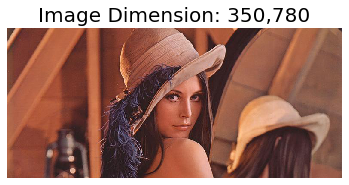

In [15]:
!rm -f leena.jpg
!wget http://dev1-kimia.uwaterloo.ca:5000/data/ass1/leena.jpg

import matplotlib.pyplot as plt
# make matplotlib to show plots inline
%matplotlib inline

from skimage.io import imread

def show_image(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='Greys_r')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.title('Image Dimension: {0},{1}'.format(img.shape[0], img.shape[1]), fontsize=20)
    

## WRITE CODE HERE
image = imread("leena.jpg")
show_image(image)

**STEP 2: Compressing an image using PCA**

An image is made of 3 (or 4) channels (RGB). We will build a compression algorithm that applies on a single channel at a time to compress an entire multi-channel image.

**Compression Strategy using PCA**

- The above image you have read is of size `350 x 780`, i.e. width is `780` and height is `350`
- Patch the image into `10x10` pixels patches yielding `35x78=2730` patches in total.
- Flatten each patch `(10x10)` into `100` dimensional vector.
- Now (for each channel) you will have `2730` number of `100-d` vectors.
- Apply PCA on these vectors.
- Reduce the dimensionality of `100-d` vector to `5-d`.

I've given you two functions `patchify` and `depatchify`. 

`patchify` creates `100-d` vectors from all the patches from a given image and `depatchify` combines these `100-d` patches back to the image of the given size.

Please read through code below and figure out how these two functions work.

**NOTE**: `convert_to_cf` is important function to note (in cell below). It converts channel last format image to channel first format. Images that you read through `imread` function returns array of shape `X x Y x 3` channel is last axis, it is easier if channel were first axis then to extract any channel you can do use first indexer.

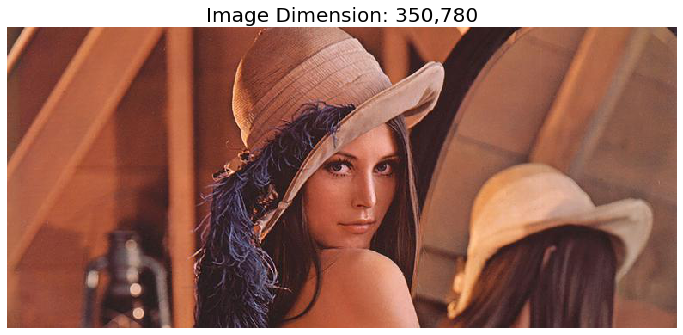

In [16]:
from sklearn.decomposition import PCA
import numpy as np


def patchify(img, ps=(10, 10)):
    patches = []
    h, w = img.shape
    for i in range(0, h, ps[0]):
        for j in range(0, w, ps[1]):
            patches.append(img[i:i+ps[0], j:j+ps[1]].ravel()) 
    return np.array(patches)


def depatchify(patches, patch_size=(10, 10), img_size=(350, 780)):
    # normalize
    patches[patches > 255.] = 255.
    patches[patches < 0.] = 0.
    
    # convert to unint8
    patches = patches.astype('uint8')
    rec_img = np.zeros(img_size, dtype='uint8')
    ph, pw = patch_size
    
    h, w = img_size
    x = 0
    for i in range(0, h, ph):
        for j in range(0, w, pw):
            rec_img[i:i+ph, j:j+pw] = patches[x].reshape((ph, pw))
            x += 1
            
    return rec_img

def convert_to_cf(img_cl):
    # convert image to channel first
    img_cf = np.swapaxes(img_cl.T, 1, 2)
    return img_cf

image=imread('leena.jpg')
img_cf = convert_to_cf(image)

# I'll patchify each channel and depatchify them
# Then I'll stack them together to create original image back
ch1 = depatchify(patchify(img_cf[0])) # first channel
ch2 = depatchify(patchify(img_cf[1])) # second channel
ch3 = depatchify(patchify(img_cf[2])) # third channel

# combine them now
rec_img = np.dstack((ch1, ch2, ch3))
plt.figure(figsize=(12, 12))
show_image(rec_img)

**STEP 3: Compressing a single channel of an image (FILL TWO FUNCTIONS BELOW)**

Now you are familiar with how `patchify` and `depatchify` work. Do the following:

1. Write a function `compress` that takes a single image's channel as its input. And it returns the compressed version of channel and the auxiliary data required for decompressing it. Return type of this function should be dictionary.
2. Write another function `decompress` that will take the dictionary data you returned from the previous `compress` function. This funcion should decompress the dictionary data to an image channel (that was compressed).
3. PCA compression is lossy compression algorithm -- means you will loose the information during the decompression phase.
4. We should be able to call two of your functions like so `decompress(compress(img_ch[0]))` to compress and decompress the given image's channel.

**Compress: Pseudo code**
- `Patchify` the given image's channel (input).
- Run `PCA` on the patches (you may use sklearn's implementation) to reduce them to `5d` vectors.
- You will need `basis vectors` or `principal components` and `mean` in order to reconstruct the data back to `100d`
- Return dictionary: `{'compressed_patches': 5d vectors, 'aux_data': principal components/basis vectors/means/final size of image}`
- By converting `100d` to `5d`, you reduce size by `20` times.

**Decompress: Pseudo code**
- Input is dictionary as returned by your `compress` function.
- Use `5d` vectors and do inverse PCA (check tutorial 2) and convert them back to `100d` vectors.
- Use `depatchify` function to convert these reconstructed `100d` vectors into an image channel

**Tip**:  Good code is always modular and easy to read.

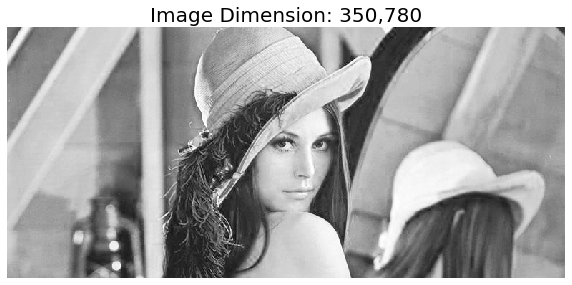

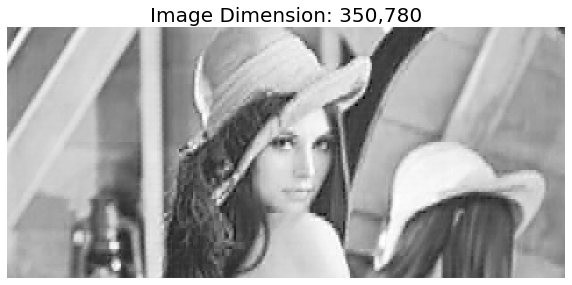

In [17]:
# COMPLETE FOLLOWING FUNCTIONS
from sklearn.decomposition import PCA

def compress(img_ch, n_components=5):
    """
    Inputs
        img_ch: one of the channel of given image
        n_components: number of components returned by PCA
    Returns
        comp_data: Some data structure (may be dict.) that represents compressed form of given input
        along with auxiliary data required for decompression (components_, mean_ and shape of input image)
    """
    # patchify img_ch
    patches = patchify(img_ch)

    #initialize PCA
    pca = PCA(n_components)
    pca.fit(patches)

    #build auxillary data
    aux_data = [pca.components_, pca.mean_, patches.shape]

    #convert patches to 5d
    compressed_patches = pca.transform(patches)

    #return dictionary with compressed image data and auxillary data
    return {'y': compressed_patches, 'aux_data': aux_data}

def decompress(comp_data):
    """
    Inputs
        comp_data: data structure that is returned by `compress` function
    Returns
        img_ch: decompressed form of channel compressed and contained inside `comp_data` data structure
    """
    y = comp_data['y']
    components, means, img_size = comp_data['aux_data']
    
    # recontruct the patches to 100d using aux_data and inverse PCA

    #set pca components and means to aux data
    pca.components_ = components
    pca.mean_ = means

    #run inverse transform on compressed channel
    rec_patches = pca.inverse_transform(y)

    # depatchify and return img_ch
    img_ch = depatchify(rec_patches)
    return img_ch

# Red channel
# visualize your compression and decompression
img_ch = img_cf[0]
plt.figure(figsize=(10, 10))
show_image(img_ch)


plt.figure(figsize=(10, 10))
show_image(decompress(compress(img_ch, n_components=5)))

**STEP 3: Compress and decompress entire image (FILL TWO MORE FUNCTIONS)**

Write a `compress_image` function that:

- takes `channel last` (regular image read from `imread`) representation of an image
- convert `channel last` to `channel first` representation using `convert_to_cf` function defined previously
- compresses each of the channel using `compress` function
- Return a single dictionary that contains all auxiliary data required to reconstruct/decompress the entire image back.

Similarly, write `decompress_image` function that:

- decompresses the image compressed by `compress_image` function 
- return `channel last` image

**NOTE:** You would patchify each channel and implement PCA on each channel thus for decompression you need `components_`, `mean_` for each channel and you need shape of input image as well.

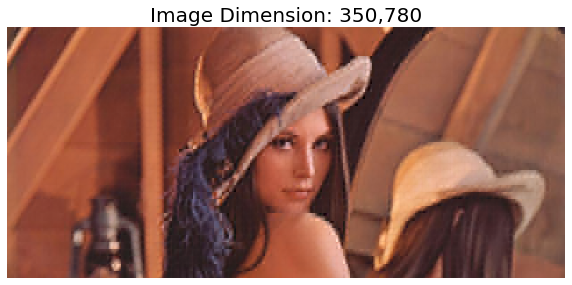

In [18]:
def compress_image(img):
    """
    Inputs:
        img_cf: `Channel last` image data
    """
    cf = convert_to_cf(img)

    image_data = {}
    index = 0;
    for c in cf:
      #compress channel
      compressed = compress(c)

      #store compressed channel and decompression data into image_data
      image_data['channel_'+str(index)+'_y'] = compressed['y']
      image_data['channel_'+str(index)+'_aux_data'] = compressed['aux_data']

      #increment index for schema
      index = index + 1
    return image_data

def decompress_image(comp_img):
    """
    Returns:
        img_rec: Decompressed `channel last` image
    """
    decomp_img = []
    num_channels = (int(len(comp_img.keys()) / 2))
    for index in range(num_channels):
      #build input dict for decompress method
      y = comp_img['channel_'+str(index)+'_y']
      aux_data = comp_img['channel_'+str(index)+'_aux_data']
      comp_img_dict = {'y': y, 'aux_data': aux_data}

      #run decompress method on channel
      ch_decomp = decompress(comp_img_dict)

      #append decompressed channel to decompressed image
      decomp_img.append(ch_decomp)

    #convert to numpy array
    decomp_img = np.array(decomp_img)
    #put channels together
    rec_img = np.dstack((decomp_img[0,:,:], decomp_img[1,:,:], decomp_img[2,:,:]))

    return rec_img

#test to make sure compression and decompression work as expected
comp = compress_image(imread("leena.jpg"))    
decomp = decompress_image(comp)

plt.figure(figsize=(10, 10))
show_image(decomp)

**STEP 4: Serialization and de-serialization**

You can easily (de)serialize dictionary using `np.save` and `np.load` (see example below)

`compress_and_serialize` should:
- Read image given by `inp_path`
- Use `compress_image` to compress it
- Serialize the compressed data using `np.save` to a file specified by `out_path`

**NOTE:** All the data required for deserialization must be saved to a one single file only.

`deserialize_and_decompress` should:
- Read the file specified by `inp_path` using `np.load`
- Use `decompress_image` function to decompress it
- Return image (channel last as returned by `decompress_image`) function

In [19]:
# EXAMPLE OF SAVING AND LOADING DICTIONARY OBJECT TO/FROM FILESYSTEM
d = {'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}
np.save('example.npy', d, allow_pickle=True)
ds = np.load('example.npy', allow_pickle=True).item()

ds

{'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}

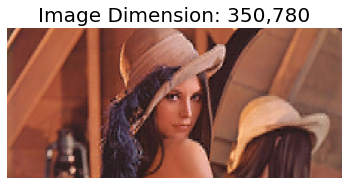

In [20]:
# COMPLETE THESE TWO FUNCTIONS
def compress_and_serialize(inp_path='leena.jpg', out_path='output.bin'):
  #read input image
  img = imread(inp_path)

  #compress input image
  compressed = compress_image(img)

  #serialize compressed data
  np.save(out_path, compressed, allow_pickle=True)

  return "Image Serialized"

def deserialize_and_decompress(inp_path='output.bin.npy'): #compress_and_serialize adds .npy at end of path
  #load serialized data from input path
  compressed = np.load(inp_path, allow_pickle=True).item()

  #decompress image data
  decompressed = decompress_image(compressed)

  return decompressed


#test functions
compress_and_serialize()
show_image(deserialize_and_decompress())

**STEP 5: What is the size of output.bin file?**

Did you end of in compressing anything? Conclude your experiments!

**Conclusion**

The file doesn't actually seem to have been compressed, it ended up being a lot bigger than the original. This may be because the skimage function does some compression of its own. Another reason for this could be all of the auxillary data that needs to be saved along with each channel in order for it to be reconstructed.


In [21]:
import os

print('Original', os.path.getsize('leena.jpg'), 'bytes')
print('Compressed', os.path.getsize('output.bin.npy'), 'bytes')

Original 35740 bytes
Compressed 342867 bytes


## Task 2: Rotation and Translation Invariance in PCA

**STEP 1 (done already): Create normally distributed datapoints**

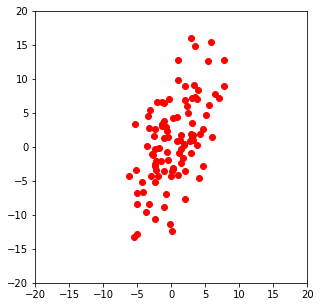

In [22]:
mean = [0, 0]
cov = [[10, 10], [10, 40]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
X = np.array(list(zip(x, y)))

def plot_data(X):
    plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
plot_data(X)

**STEP 2: Rotate the data by 45 degrees and create new datapoints X_rot**

Write a code to rotate X by 45$^\circ$

- Use rotation matrix
- Or individually rotate each point in `X` by 45 degrees
- Use `plot_data` function defined in cell above to visualize the rotated data

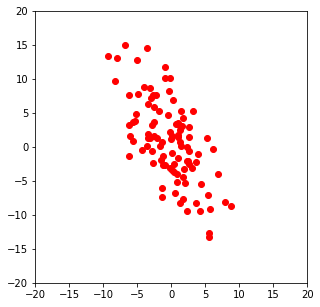

In [33]:
# Code to rotate X

#initialize rotation matrix
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
Rot = np.array(((c, -s), (s, c)))

#rotate each point using rotation matrix
X_rot = np.empty(X.shape)
index = 0
for point in X:
  X_rot[index] = np.dot(Rot, point)
  index = index + 1
  

# populate new matrix X_rot
plot_data(X_rot)

**STEP 3 (done but need explanation): Perform pca with n_components=2**

Do you see anything interesting?

Explain the code below and write down your observations (2-3 lines only).


**Observations**

Compressing X and the rotated version of X with PCA leads to the exact same set of points. This makes perfect sense because all PCA does is find the axis with the greatest variance and project the points onto that axis. X and rotated X will present that same axis, just rotated, so the projection will lead to the same points.

In [24]:
import pandas as pd

def visualize_components(X, X_rot):
    pca = PCA(n_components=2)

    pca.fit(X)
    df1 = pd.DataFrame(pca.fit_transform(X))
    df2 = pd.DataFrame(pca.fit_transform(X_rot))

    return pd.concat((df1, df2), axis=1)[:20]
    
visualize_components(X, X_rot)


,0,1,0,1
0,8.755741,2.388241,8.755741,2.388241
1,2.284974,4.785037,2.284974,4.785037
2,12.772557,-0.836783,12.772557,-0.836783
3,15.153730,2.642748,15.153730,2.642748
4,-3.398794,0.780376,-3.398794,0.780376
5,-8.929925,2.576874,-8.929925,2.576874
6,-5.003531,-1.331314,-5.003531,-1.331314
7,-12.564960,-4.136952,-12.564960,-4.136952
8,1.570813,2.366697,1.570813,2.366697
9,-8.526647,1.801577,-8.526647,1.801577


**STEP 4: Perform PCA again and find angle between principal components**

- Perform PCA on X and X_rot with n_components=1
- It will give one basis vector for each of data (X and X_rot)
- Find the angle between these two basis vectors
- Explain your observations?

**Observations**

The angle between the basis vectors for the 1D compression is 45 degrees. This makes perfect sense because one dataset is just a 45 degrees rotated version of the other. The vectors with the highest variance or the basis vectors will thus have a 45 degree difference. 

In [25]:
from numpy.linalg import norm
import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle_between(a,b):
    # COMPLETE THIS FUNCTION
    # CALCULATE ANGLE IN RAD BETWEEN TWO VECTORS
  return math.acos(dotproduct(a, b) / (length(a) * length(b)))
    

pca = PCA(n_components=1)
pca.fit(X)
c1 = pca.components_

pca.fit(X_rot)
c2 = pca.components_

np.rad2deg(angle_between(c1[0], c2[0]))


45.0

**(NO MARKS) STEP 5: Repeat these experiments for translation as well**

There is not marks for this part. You can do this for your own learning.

Now translate every point in `X` by fixed `x` and `y` amount.

`X = X + [1, 2]`

like so and repeat all the above experiments in cell below and write down your observations:

In [0]:
# PERFORM EXPERIMENTS WITH TRANSLATION HERE
# NO MARKS FOR DOING THIS

## TASK 3: Recovery of corrupted images using PCA

Check the code below.

It corrupts the `leena.jpg` image that you worked on before.

Check very carefully what below code is doing on the image and answer:

**Is it same as rotation of data points (like done before), if yes explain (just one liner)?**

It's the same as rotation - the data stays the same but the "order" of the data changes, resulting in rotated basis vectors.

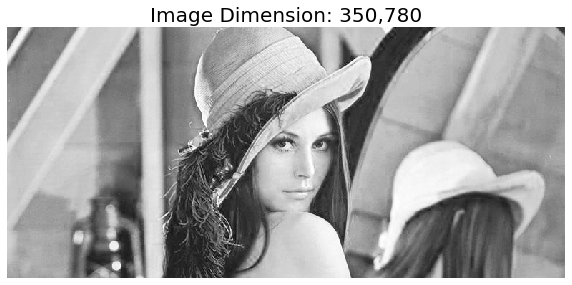

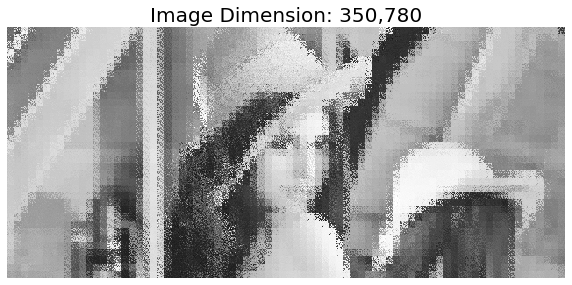

In [27]:
# Code for corrupting the leena image
image = convert_to_cf(imread('leena.jpg'))[0]

def corrupt_image(img):
    # lets patchify R channel with patches of 35x78 patches
    patches = patchify(img)
    
    # Noise 1:
    # lets jumble pixels of patches now
    jumble_idx = list(range(len(patches[0])))
    np.random.shuffle(jumble_idx)
    
    jumbled_patches = np.array([patch[jumble_idx] for patch in patches])
    rec_jumbled_image = depatchify(jumbled_patches, img_size=img.shape)
    
    return rec_jumbled_image


cimage = corrupt_image(image)

plt.figure(figsize=(10,10))
show_image(image)

plt.figure(figsize=(10,10))
show_image(cimage)


**Recovering from the corruption**

Use the `compress` function you coded earlier to get compressed form of original leena image and corrupted leena image.

We will try to recover the corrupted leena given the compressed version of the original leena.

Notice in the code below, I replaced `aux_data` of the corrupted version with `aux_data` of the original version.

Does the code below work in recovering the original leena image back?

**Explain how the code works and show it actually works?**

Using the corrupt image basis vectors to put the image back together will result in the jumbled image, as shown below. The data is being decompressed and put together in that same "wrong order". Using the correct auxillary data essentially rotates the jumbled data to its original position because the correct basis vectors are used, shown by the second image below.

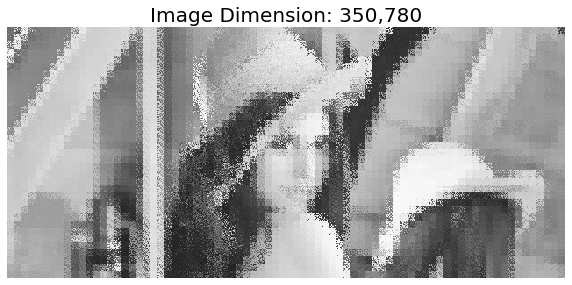

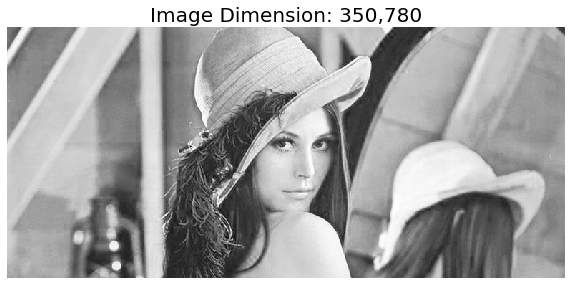

In [28]:
# This assuming your compress function returns dictionary which contains `aux_data`
# if you coded your compress in diferent way then change code below appropriately
# basically you need to replace auxiliary data of corrupted with original while keeping compressed (transformed) data same
d = compress(image, n_components=50)
d1 = compress(cimage, n_components=50)

# print(d1['aux_data'])
# print("BREAK")
# print(d['aux_data'])

plt.figure(figsize=(10, 10))
show_image(decompress(d1))

d1['aux_data'] = d['aux_data']
plt.figure(figsize=(10, 10))
show_image(decompress(d1))


## Task 4: Decrypting manuscript of the lost civilization

You belong to one of the advanced civilizations.  While exploring the universe you landed on the planet Earth. However, there are no inhabitants on the planet anymore. While your exploration, you came across a damaged hard drive that contains various images. You suspect that these images represent digits as written by people of Earth. You recovered all the data from the hard drive safely. You opened up your Google Colab (python is popular among alien species and Google is still working while Earth has no inhabitants), you started plotting the images you just recovered. 

In [29]:
!rm -f recovered_images.npy
!wget http://dev1-kimia.uwaterloo.ca:5000/data/ass1/recovered_images.npy

rimages = np.load('recovered_images.npy')
rimages.shape

--2020-02-02 18:24:03--  http://dev1-kimia.uwaterloo.ca:5000/data/ass1/recovered_images.npy
Resolving dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)... 129.97.229.28
Connecting to dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)|129.97.229.28|:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15760 (15K) [application/octet-stream]
Saving to: ‘recovered_images.npy’

recovered_images.np 100%[===================>]  15.39K  --.-KB/s    in 0.04s   

2020-02-02 18:24:03 (416 KB/s) - ‘recovered_images.npy’ saved [15760/15760]



(20, 28, 28)

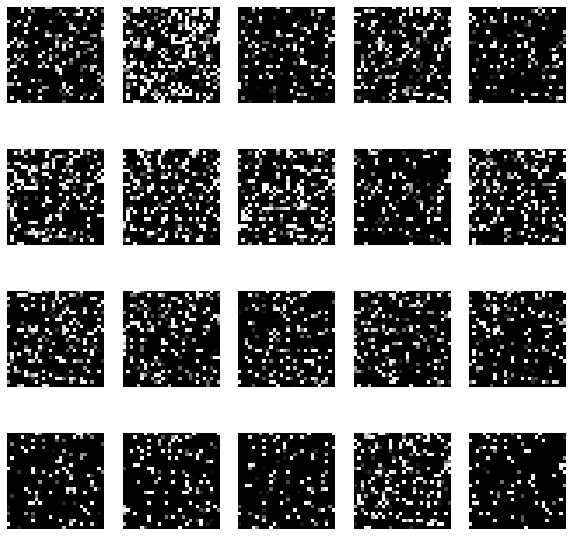

In [30]:
def plot_manuscript(images):
    for i, img in enumerate(images):
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
        
plt.figure(figsize=(10, 10))
plot_manuscript(rimages)

You are a smart alien, and you've figured out that these images are encrypted, and are not in their original form. You also figured out that encryption is just the jumbling of pixels in **a fixed pattern**. Since you're unaware of the manuscript, you cannot decrypt the images just by themselves even if they follow the fixed jumbling pattern. However, fortunately you found the `principal components` and `mean` of the the original manuscript somewhere in the same harddisk. Now, your task is to recover all the 20 images and plot them nicely in the cell below.

Use `plot_manuscript` function from above to plot the recovered manuscript.

--2020-02-02 18:28:49--  http://dev1-kimia.uwaterloo.ca:5000/data/ass1/original_pca.npy
Resolving dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)... 129.97.229.28
Connecting to dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)|129.97.229.28|:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125520 (123K) [application/octet-stream]
Saving to: ‘original_pca.npy’

original_pca.npy    100%[===================>] 122.58K  --.-KB/s    in 0.1s    

2020-02-02 18:28:49 (1.08 MB/s) - ‘original_pca.npy’ saved [125520/125520]

--2020-02-02 18:28:51--  http://dev1-kimia.uwaterloo.ca:5000/data/ass1/original_mean.npy
Resolving dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)... 129.97.229.28
Connecting to dev1-kimia.uwaterloo.ca (dev1-kimia.uwaterloo.ca)|129.97.229.28|:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6352 (6.2K) [application/octet-stream]
Saving to: ‘original_mean.npy’

original_mean.npy   100%[===================>]   6.20K  --.-KB/

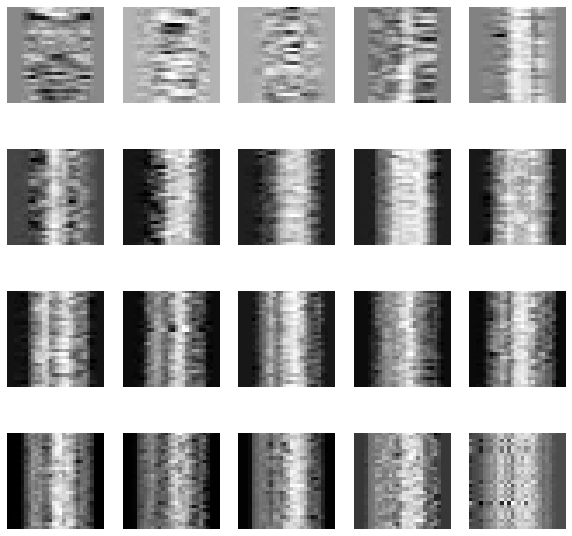

In [34]:
!rm -f original_pca.npy
!wget http://dev1-kimia.uwaterloo.ca:5000/data/ass1/original_pca.npy

!rm -f original_mean.npy
!wget http://dev1-kimia.uwaterloo.ca:5000/data/ass1/original_mean.npy

original_components = np.load('original_pca.npy')
original_mean = np.load('original_mean.npy')

# Write your code here

#reshape means to 28x28 numpy array
original_mean = np.reshape(original_mean, [28, 28])

new_images = []
index = 0

for image in rimages:
    #initialize PCA with all n=28 components
    pca = PCA(n_components=28)
    pca.fit(image)

    #compress images
    compressed_image = pca.transform(image)

    #set pca components and means to original aux data
    pca.components_ = np.reshape(original_components[index], [28, 28]) #reshaped as per inverse_transform requirements
    pca.mean_ = original_mean[index]

    #run inverse transform on compressed image with original aux data
    inverse = pca.inverse_transform(compressed_image)

    #append new image data to new_images
    new_images.append(inverse)
    index = index + 1

# plot manuscript
plt.figure(figsize=(10, 10))
plot_manuscript(new_images)